In [1]:
import numpy as np
import open3d as o3d
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.18.0


In [12]:
def draw_centers(centers, radius, color):
    spheres = []
    sphere_radius = radius 
    
    for point in centers:
        mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
        mesh_sphere.compute_vertex_normals()
        
        mesh_sphere.translate(point)
        
        spheres.append(mesh_sphere)
    
    all_spheres = o3d.geometry.TriangleMesh()
    for sphere in spheres:
        all_spheres += sphere
    
    all_spheres.paint_uniform_color(color) 
    
    o3d.visualization.draw_geometries([all_spheres])

In [7]:
dataset = 'Dancer'
num_frames = 15
num_points = 3000-5

In [21]:
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/test_mesh_0res_{num_points}_"
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/mesh_0res_{num_points}_"
file_prefix = fr"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-4000/impr/dancer_fr0impr_{num_points}_"
#file_prefix = fr"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/basketball_player_fr0res_{num_points}_"
#file_prefix = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/impr/basketball_player_fr0impr_{num_points}_'
#file_prefix = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-3000/mitch_fr0res_{num_points}_'
#file_prefix = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/thomas_fr0res_{num_points}_'

file_extension = ".xyz"

max_distance_matrix = np.zeros((num_points, num_points))
offset = 0
for index in range(5, 21):
    print(index)
    all_points = []
    filename = f"{file_prefix}{index:03d}{file_extension}"
    with open(filename, 'r') as file:
        for line in file:
            points = list(map(float, line.split()))
            all_points.append(points)
        all_points = np.array(all_points)
        print(all_points[0])
        for i in range(num_points):
            #print("i: ", i)
            for j in range(i+1, num_points):
                if np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0)) > max_distance_matrix[i, j]:
                    max_distance_matrix[i, j] = np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0))
                
                max_distance_matrix[j, i] = max_distance_matrix[i, j]
    
    if (index == offset + 14 or index == offset + 9):
        np.savetxt(fr"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-3000/{dataset}_distance_matrix_{index-offset-4}_{num_points}.txt", max_distance_matrix)
print(all_points.__len__())


            
np.savetxt(fr"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-3000/{dataset}_distance_matrix_15_{num_points}.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/basketball_distance_matrix_{num_frames}_{num_points}_1519.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/collision_distance_matrix_{num_frames}_{num_points}_2630.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/dancer-output-max/dancer_{num_points}/dancer_distance_matrix_{num_frames}_{num_points}_0610.txt", max_distance_matrix)

print("Distance Matrix:")
print(max_distance_matrix, max_distance_matrix.shape)

5
[0.05052351 0.0573606  0.18887253]
6
[0.05100796 0.05510398 0.18384771]
7
[0.05266252 0.05541498 0.1779683 ]
8
[0.05686284 0.0590732  0.17484403]
9
[0.06094931 0.0636804  0.17424643]
10
[0.06418709 0.0685897  0.17506918]
11
[0.06604121 0.07290005 0.1764097 ]
12
[0.06629196 0.07552633 0.18012872]
13
[0.06484424 0.07299668 0.18667772]
14
[0.06287543 0.06624778 0.19402595]
15
[0.06062923 0.05430574 0.1998614 ]
16
[0.06150372 0.04314635 0.19818869]
17
[0.06610448 0.04197012 0.19136415]
18
[0.06897759 0.04724769 0.18423627]
19
[0.07082378 0.05451985 0.17771548]
20
[0.07263406 0.06359228 0.1708539 ]
3995
Distance Matrix:
[[0.         0.72539793 0.29709197 ... 0.94859859 0.73839753 0.49743534]
 [0.72539793 0.         0.43097745 ... 0.25548642 0.06345718 0.2815467 ]
 [0.29709197 0.43097745 0.         ... 0.66144399 0.44786634 0.24437803]
 ...
 [0.94859859 0.25548642 0.66144399 ... 0.         0.21932094 0.47009554]
 [0.73839753 0.06345718 0.44786634 ... 0.21932094 0.         0.2737471 ]
 [0.4

In [43]:
num_frames = 10
num_points = 2000

In [23]:
#Levi_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Levi_distance_matrix_5_{num_points}.txt")
Dancer_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-3000/Dancer_distance_matrix_{num_frames}_{num_points}.txt")
#Basket_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Basketball-output-max-2000/Basket_distance_matrix_{num_frames}_{num_points}.txt")
#Mitch_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-1000/Mitch_distance_matrix_{num_frames}_{num_points}.txt")
#Thomas_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/{dataset}_distance_matrix_{num_frames}_{num_points}.txt")
#print(Levi_distance_matrix, Levi_distance_matrix.__len__())
#print(Dancer_distance_matrix, Dancer_distance_matrix.__len__())
print(Dancer_distance_matrix, Dancer_distance_matrix.__len__())

[[0.         0.72539793 0.29709197 ... 0.94859859 0.73839753 0.49743534]
 [0.72539793 0.         0.43097745 ... 0.25361657 0.06345718 0.27991089]
 [0.29709197 0.43097745 0.         ... 0.66144399 0.44786634 0.24437803]
 ...
 [0.94859859 0.25361657 0.66144399 ... 0.         0.21860549 0.4692258 ]
 [0.73839753 0.06345718 0.44786634 ... 0.21860549 0.         0.27261087]
 [0.49743534 0.27991089 0.24437803 ... 0.4692258  0.27261087 0.        ]] 3995


C:\Users\Windows\anaconda3\envs\open3d\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


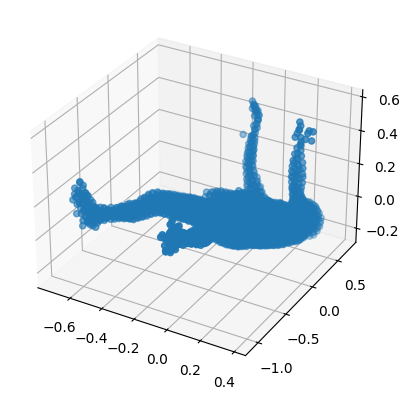

In [31]:
max_distance_matrix = Dancer_distance_matrix

mds = MDS(n_components=3, metric=True ,dissimilarity='precomputed', n_jobs=-1, eps= 1e-10, verbose=0, random_state=1, n_init = 6, max_iter = 300)
reference_centers = mds.fit_transform(max_distance_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers[:, 0], reference_centers[:, 1], reference_centers[:, 2])
plt.show()

[[ 0.04419455  0.07680917  0.18498687]
 [ 0.03280589  0.7987771   0.22256072]
 [ 0.0234607   0.3580561   0.2242611 ]
 ...
 [ 0.2500778  -0.46669626  0.09484395]
 [ 0.00153721  0.765104    0.13958855]
 [-0.19672745  1.1393145   0.219834  ]] 2000


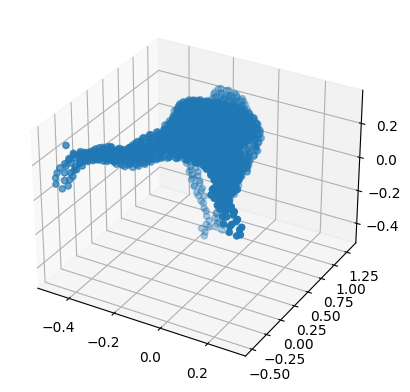

In [44]:
#center_filename_Levi = f'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Frame_00res_{num_points}_{i:03d}.xyz'
#center_filename_Dancer = f'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_{i:03d}.xyz'
#center_filename_basketball = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/basketball_player_fr0res_{num_points}_{i:03d}.xyz'
#center_filename_mitch = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/mitch_fr0res_{num_points}_{i:03d}.xyz'
center_datas = []
for i in range(5, 21):
    #center_filename = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-4000/impr/dancer_fr0impr_{num_points}_{i:03d}.xyz'
    center_filename = f'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)

center = center_datas[0]
print(center, center.__len__())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(center[:, 0], center[:, 1], center[:, 2])
plt.show()

In [84]:
mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Basketball\meshes/basketball_player_fr0024.obj') #12 18 20 22 24
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
o3d.visualization.draw_geometries([mesh])

In [45]:
draw_centers(center_datas[0], radius=0.01, color=[0.4, 0.4, 0.4])

# Mitch show different centers view of point

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.64802623999999998, 1.7885772, 0.37226209999999998 ],
			"boundingbox_min" : [ -0.34795303, 0.016872686999999997, -0.46056047999999999 ],
			"field_of_view" : 60.0,
			"front" : [ 0.14380882527229499, 0.57030650455800536, 0.80874564149220141 ],
			"lookat" : [ 0.1001658444587905, 1.0224522935579901, -0.10540857548923172 ],
			"up" : [ 0.0067094400418643008, 0.81665977790688593, -0.57708040216541789 ],
			"zoom" : 0.53999999999999981
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

## Dancer

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.30796765000000004, 1.3092679999999999, 0.34512164000000001 ],
			"boundingbox_min" : [ -0.4921799, -0.47840668000000003, -0.47321964999999999 ],
			"field_of_view" : 60.0,
			"front" : [ 0.65875414433017232, 0.16764757088969545, -0.73344206949329493 ],
			"lookat" : [ -0.092106124999999983, 0.41543065999999995, -0.064049004999999992 ],
			"up" : [ -0.13456773504168168, 0.98539220589800758, 0.10437301011856819 ],
			"zoom" : 0.5199999999999998
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 3.3196101188659668, 13.94480037689209, 2.0030701160430908 ],
			"boundingbox_min" : [ -3.2830300331115723, -4.8101100921630859, -4.4256901741027832 ],
			"field_of_view" : 60.0,
			"front" : [ -0.026368601724951469, 0.12646047237588637, -0.99162112007033143 ],
			"lookat" : [ 0.018290042877197266, 4.567345142364502, -1.2113100290298462 ],
			"up" : [ -0.011847197968179761, 0.99185684048465939, 0.12680556724407541 ],
			"zoom" : 0.53999999999999981
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

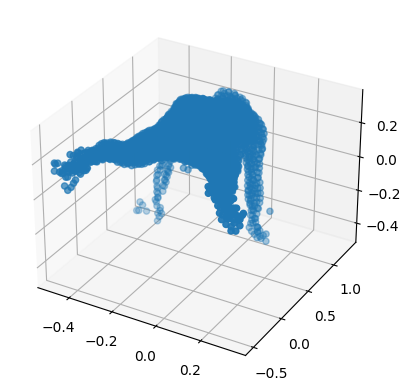

In [32]:
centers = center_datas[0]
reference_centers = reference_centers

centers_mean = np.mean(centers, axis=0)
reference_centers_mean = np.mean(reference_centers, axis=0)
centers_centered = centers - centers_mean
reference_centers_centered = reference_centers - reference_centers_mean

cov_matrix = np.dot(centers_centered.T, reference_centers_centered)

U, _, Vt = np.linalg.svd(cov_matrix)

R = np.dot(U, Vt)

reference_centers_aligned = np.dot(reference_centers_centered, R.T)

reference_centers_aligned = reference_centers_aligned + centers_mean

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers_aligned[:, 0], reference_centers_aligned[:, 1], reference_centers_aligned[:, 2])
plt.show()

In [14]:
reference_centers_aligned = center_datas[4]

In [34]:
draw_centers(reference_centers_aligned, 0.01, [0.5,0.5,0.5])

In [35]:
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/reference_centers_aligned.xyz'
output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-4000/reference_centers_aligned.xyz'
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Basketball-output-max-2000/reference_centers_aligned.xyz'
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-1000/reference_centers_aligned.xyz'
#output_filename = f'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/reference_centers_aligned.xyz'
np.savetxt(output_filename, reference_centers_aligned, fmt='%f', delimiter=' ')


with open(output_filename, 'r') as file:
    lines = file.readlines()
    print("".join(lines[:5])) 

0.057569 0.059827 0.181545
0.019447 0.777767 0.190778
0.046943 0.353584 0.208378
0.027876 1.007359 0.121685
-0.073825 0.449977 0.167576



In [90]:
#transformed_centers_path = 'G:\VS2022Projects/tvm-editing-master\TVMEditor.Test/bin\Release/net5.0\Data\Dancer_1000/reference_centers_aligned.xyz'
transformed_centers_path = 'G:\VS2022Projects/tvm-editing-master\TVMEditor.Test/bin\Release/net5.0\Data\Dancer_1000/reference_centers_aligned.xyz'
loaded_transformed_centers = np.loadtxt(transformed_centers_path)
with open(transformed_centers_path, 'r') as file:
    lines = file.readlines()
    print("".join(lines[:5])) 

0.055526 0.078598 0.171532
0.022288 0.792588 0.236942
0.018028 0.357584 0.217594
0.030021 1.006488 0.127878
-0.072214 0.462698 0.142656



In [56]:
draw_centers(loaded_transformed_centers, radius=0.01, color=[0.9921568627450981, 0.5529411764705883, 0.23529411764705882])

In [47]:
mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Basketball\reference_mesh\GoF5/reference_mesh_05.obj')
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.9921568627450981, 0.5529411764705883, 0.23529411764705882])
o3d.visualization.draw_geometries([mesh])

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 3.3163459999999998, 13.960203, 2.0888170000000001 ],
			"boundingbox_min" : [ -3.9613179999999999, -4.8267690000000005, -4.4173750000000007 ],
			"field_of_view" : 60.0,
			"front" : [ 0.47175845619474166, 0.17691354245800323, -0.86379717382248622 ],
			"lookat" : [ 0.43166323545919688, 4.9344982154823782, -0.68394788830729258 ],
			"up" : [ -0.078130033560574505, 0.98419800958629478, 0.15890240961734683 ],
			"zoom" : 0.5199999999999998
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [45]:
cmap = plt.get_cmap('tab20c')

# Get the RGBA values of the first color
color_1 = cmap(5)  # This returns a tuple (R, G, B, A) with values between 0 and 1
print(color_1[:3])

(0.9921568627450981, 0.5529411764705883, 0.23529411764705882)


In [44]:
mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Basketball\reference/fitting_mesh_Basketball_024.obj')#12 18 20 22 24
mesh.compute_vertex_normals()
mesh.paint_uniform_color(color_1[:3])
o3d.visualization.draw_geometries([mesh])
plt.plot.color

AttributeError: 'function' object has no attribute 'color'

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 3.3196101188659668, 13.94480037689209, 2.0030701160430908 ],
			"boundingbox_min" : [ -3.2830300331115723, -4.8101100921630859, -4.4256901741027832 ],
			"field_of_view" : 60.0,
			"front" : [ -0.026368601724951469, 0.12646047237588637, -0.99162112007033143 ],
			"lookat" : [ 0.018290042877197266, 4.567345142364502, -1.2113100290298462 ],
			"up" : [ -0.011847197968179761, 0.99185684048465939, 0.12680556724407541 ],
			"zoom" : 0.53999999999999981
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [26]:
cmap = plt.get_cmap('tab20c')

# Get the RGBA values of the first color
color_1 = cmap(1)  # This returns a tuple (R, G, B, A) with values between 0 and 1
print(color_1[:3])
mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Dancer_4000\reference/fitting_mesh_Dancer_005.obj')#12 18 20 22 24
mesh.compute_vertex_normals()
mesh.paint_uniform_color(color_1[:3])
o3d.visualization.draw_geometries([mesh])

(0.4196078431372549, 0.6823529411764706, 0.8392156862745098)


In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.31999498605728149, 1.3192100524902344, 0.35128900408744812 ],
			"boundingbox_min" : [ -0.50792497396469116, -0.48317500948905945, -0.4826749861240387 ],
			"field_of_view" : 60.0,
			"front" : [ -0.44163060883968613, 0.32521732753128801, -0.83617946351802686 ],
			"lookat" : [ -0.14679751994588619, 0.59867280948450774, -0.15291196709111865 ],
			"up" : [ 0.099318909999734306, 0.9439839479729315, 0.31469041943774267 ],
			"zoom" : 0.43999999999999972
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.31999498605728149, 1.3192100524902344, 0.35128900408744812 ],
			"boundingbox_min" : [ -0.50792497396469116, -0.48317500948905945, -0.4826749861240387 ],
			"field_of_view" : 60.0,
			"front" : [ -0.47972094058772591, 0.13381734636805728, -0.8671566968966099 ],
			"lookat" : [ -0.10418017373607193, 0.70131770963679652, -0.12955195756900331 ],
			"up" : [ 0.010676306111636273, 0.98911867479341875, 0.14673194492925506 ],
			"zoom" : 0.23999999999999957
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}